<a href="https://colab.research.google.com/github/NadithM/pythonII/blob/master/matplot-new.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Line Charts and Analyzing Data from CSVs

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


###(01) Creating simple Line Graph

###*As we all know, we need set of coordinates(X and Y coordinates) for creating a Line graph.*

Let's see by taking simple example how to create a graph using Python. In this example we will consider the annual salary(In USD) taken by software engineers based on their age.

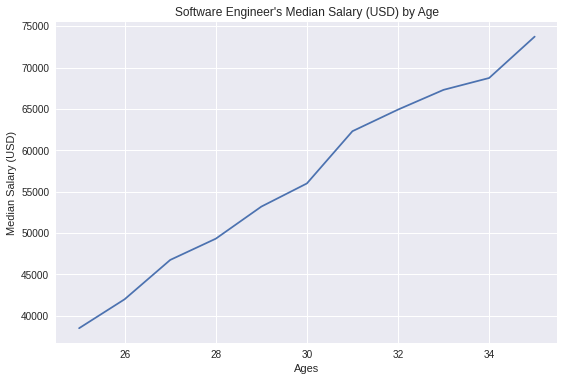

In [ ]:
from matplotlib import pyplot as plt
# first we have to populate the coordinates of X and Y
ages_x = [25,26,27,28,29,30,31,32,33,34,35]
dev_y = [38496,42000,46752,49320,53200,56000,62316,64928,67317,68748,73752]

# Then simply plot X and Y coordinates
plt.plot(ages_x, dev_y)

# finally the graph can be named meaningfully.
plt.xlabel('Ages')
plt.ylabel('Median Salary (USD)')
plt.title('Software Engineer\'s Median Salary (USD) by Age')

plt.show()

So, It's obvious,
*   Line graphs can give a quick analysis of data. You're able to quickly tell the range, minimum/maximum, as well as if there are any gaps or clusters. This also means that it can easily observe changes over a certain period of time. When drawing them, you're able to use exact values from your data

Okay, Let's dig in bit more and see how Python helps to do a comparison using line graph.



###(02) Comparing multiple Line Graphs 

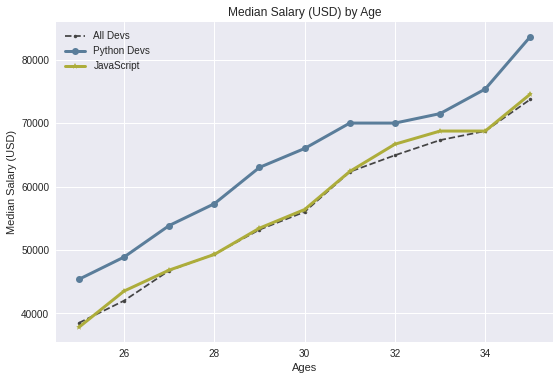

In [ ]:
from matplotlib import pyplot as plt
#print(plt.style.available) #-> This will show various graph styles supports
plt.style.use('seaborn')

# first we have to populate the coordinates of X and Y (Y will be the median dev salary for all software engineers)
ages_x = [25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35]
dev_y = [38496, 42000, 46752, 49320, 53200, 56000, 62316, 64928, 67317, 68748, 73752]

# let's populate coordinates for the next line we are drawing. X coordinate will be the same as we used before. (Y will be the median dev salary for Python software engineers)
py_dev_y = [45372, 48876, 53850, 57287, 63016, 65998, 70003, 70000, 71496, 75370, 83640]


# finally populate coordinates for the final line we are drawing. X coordinate will be the same again.  (Y will be the median dev salary for JavaScript software engineers)
js_dev_y = [37810, 43515, 46823, 49293, 53437, 56373, 62375, 66674, 68745, 68746, 74583]


# Then simply plot all X and Y coordinates with different colors and markers.
plt.plot(ages_x, dev_y, color='#444444', linestyle='--',marker='.', label="All Devs")
plt.plot(ages_x, py_dev_y, color='#5a7d9a', marker='o', linewidth=3, label='Python Devs')
plt.plot(ages_x, js_dev_y, color='#adad3b', marker='*', linewidth=3, label='JavaScript')


# finally the graph can be named meaningfully.
plt.xlabel('Ages')
plt.ylabel('Median Salary (USD)')
plt.title('Median Salary (USD) by Age')
plt.legend(['All Devs', 'Python Devs','JavaScript'])

plt.grid(True)
plt.tight_layout()

# finally let's save the graph to image
plt.savefig('Line graph plot Comparision of software engineer\'s salary.png')

plt.show()

### *Let's use this knowledge about Line graph to analize a seperate problem. For example let's take Olympic Games happens in year 2016 and 2000.*

In this example we will consider the number of athletes participated from different countries in the year 2016 and 2000 Olympics.




/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:28: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:30: UserWarning: Boolean Series key will be reindexed to match DataFrame index.


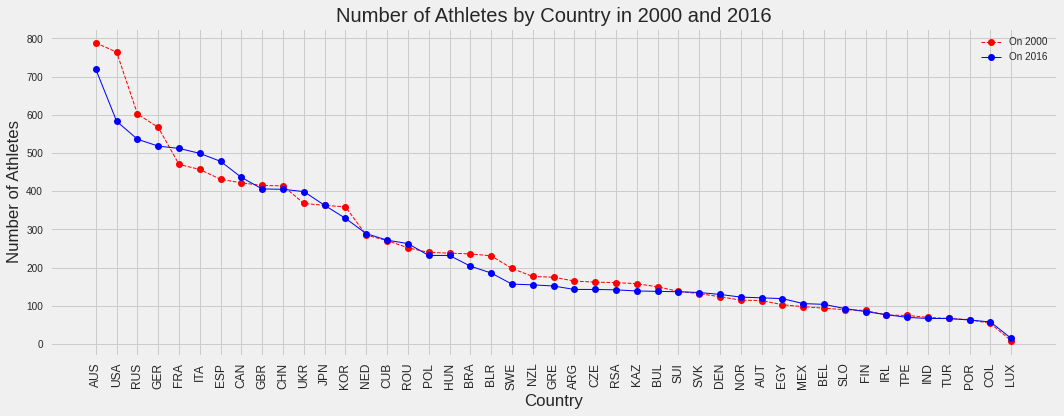

In [ ]:
from matplotlib import pyplot as plt
import pandas as pd
#configure the graph size & style (height and width)
plt.figure(figsize=(15,6))
plt.style.use('fivethirtyeight') 

#loading the data from CSV
athlete_data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/data/athlete_events.csv')

#filter first 50 countries where most number of atletes participation in all time
x = athlete_data.NOC.value_counts().index[0:50]
#filter all the data from those 50 countries
top_50_country_data = athlete_data[athlete_data.NOC.isin(x)]

#creating conditions to filter atletes participated in the years 2016 and 2000
is_2000 =  top_50_country_data['Year']==2000
is_2016 =  top_50_country_data['Year']==2016


#filter based on the conditions
#first filter number of atletes from 2000 olympics from those 50 countries, sorted order max to min
y_2000=top_50_country_data[is_2000].NOC.value_counts().values[0:50]
#filter countries names participated in 2000 olympics,max to min
x_2000=top_50_country_data[is_2000].NOC.value_counts().index[0:50]
countries_participated_in_2000 = top_50_country_data[top_50_country_data.NOC.isin(x_2000)]

#then get the number of atletes from 2016 Olympics,those countires participated in 2000
y_2016=countries_participated_in_2000[is_2016].NOC.value_counts().values[0:50]
#filter countries names participated in 2016 olympics,max to min
x_2016=countries_participated_in_2000[is_2000].NOC.value_counts().index[0:50]

#process data to visualize as a comparison
y_2016_processed_values = []
index = 0
for country_2000 in x_2000:
  resultIndex = np.where(x_2016 == country_2000)
  y_2016_processed_values.append(y_2016[resultIndex[0]])


#plot graphs
plt.plot(x_2000, y_2000, color='#ff0000', linestyle='--',linewidth=1,marker='o', label="Number of Athletes in 2000")
plt.plot(x_2000, y_2016_processed_values, color='#0000ff', marker='o',linewidth=1, label='Number of Athletes in 2016')

#label the graphs
plt.xlabel('Country')
plt.ylabel('Number of Athletes')
plt.title('Number of Athletes by Country in 2000 and 2016')
plt.legend(['On 2000', 'On 2016'])
plt.xticks(rotation='vertical',size=12)
plt.grid(True)
plt.tight_layout() 

#save as an image
plt.savefig('Line graph plot comparison of Olympics 2000 vs 2016.png')

plt.show()

###*So what are its disadvantages?* Well, 


*   line graphs are generally good only when you have few data values. It also requires that the range in your data not be too big.


You may have noticed that the line graph isn't as visually appealing in this example. So, Let's try to solve this problem by using some other form of graph for this data visualization example.

#Bar Charts and Analyzing Data from CSVs

A bar chart is used when you want to show 

*   A distribution of data points or perform a comparison of metric values across different subgroups of your data. 

From a bar chart, we can see which groups are highest or most common, and how other groups compare against the others

##(01) Create Bar Chart

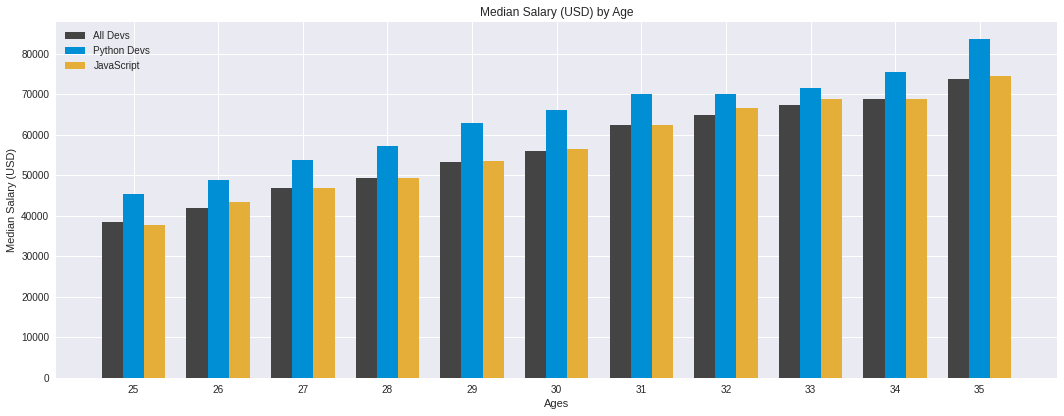

In [ ]:
import numpy as np
from matplotlib import pyplot as plt
plt.figure(figsize=(15,6))
plt.style.use("seaborn")

ages_x = [25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35]

x_indexes = np.arange(len(ages_x))
width = 0.25

dev_y = [38496, 42000, 46752, 49320, 53200, 56000, 62316, 64928, 67317, 68748, 73752]

plt.bar(x_indexes - width, dev_y, width=width, color='#444444', label="All Devs")

py_dev_y = [45372, 48876, 53850, 57287, 63016, 65998, 70003, 70000, 71496, 75370, 83640]

plt.bar(x_indexes, py_dev_y, width=width, color='#008fd5', label='Python Devs')

js_dev_y = [37810, 43515, 46823, 49293, 53437, 56373, 62375, 66674, 68745, 68746, 74583]

plt.bar(x_indexes + width, js_dev_y, width=width, color='#e5ae38',  label='JavaScript')

plt.xlabel('Ages')
plt.ylabel('Median Salary (USD)')
plt.title('Median Salary (USD) by Age')

plt.legend()

plt.xticks(ticks=x_indexes, labels=ages_x)

plt.tight_layout() 

plt.show()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:31: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:33: UserWarning: Boolean Series key will be reindexed to match DataFrame index.


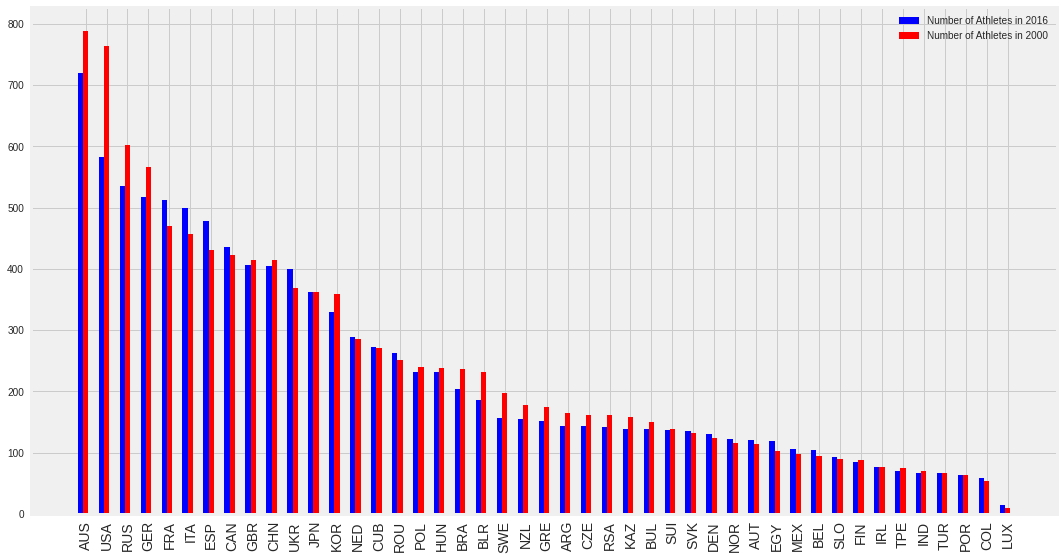

<Figure size 576x396 with 0 Axes>

In [ ]:
from matplotlib import pyplot as plt
import pandas as pd
import numpy as np

plt.figure(figsize=(15,8))
plt.style.use("fivethirtyeight")


#loading the data from CSV
athlete_data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/data/athlete_events.csv')

#filter first 50 countries where most number of atletes participation in all time
x = athlete_data.NOC.value_counts().index[0:50]
#filter all the data from those 50 countries
top_50_country_data = athlete_data[athlete_data.NOC.isin(x)]

#creating conditions to filter atletes participated in the years 2016 and 2000
is_2000 =  top_50_country_data['Year']==2000
is_2016 =  top_50_country_data['Year']==2016

#filter based on the conditions
#first filter number of atletes from 2000 olympics from those 50 countries, sorted order max to min
y_2000=top_50_country_data[is_2000].NOC.value_counts().values[0:50]
#filter countries names participated in 2000 olympics,max to min
x_2000=top_50_country_data[is_2000].NOC.value_counts().index[0:50]
x_indexes = np.arange(len(x_2000))
width = 0.25
countries_participated_in_2000 = top_50_country_data[top_50_country_data.NOC.isin(x_2000)]

#then get the number of atletes from 2016 Olympics,those countires participated in 2000
y_2016=countries_participated_in_2000[is_2016].NOC.value_counts().values[0:50]
#filter countries names participated in 2016 olympics,max to min
x_2016=countries_participated_in_2000[is_2000].NOC.value_counts().index[0:50]

#process data to visualize as a comparison
y_2016_processed_values = []
index = 0
for country_2000 in x_2000:
  resultIndex = np.where(x_2016 == country_2000)
  y_2016_processed_values.append(y_2016[resultIndex[0]])

plt.bar(x_indexes - width, y_2016, width=width, color='#0000ff', label="Number of Athletes in 2016")
plt.bar(x_indexes, y_2000, width=width, color='#ff0000', label='Number of Athletes in 2000')

plt.legend()
plt.xticks(ticks=x_indexes, labels=x_2016,rotation='vertical',size=14)
plt.tight_layout() 
plt.show()
plt.savefig('Bar chart plot comparison of Olympics 2000 vs 2016.png')

##(02) Contd...

Horizontal bar charts have some advantages compared to the vertical bar charts 
* Labels are easier to display and with a big dataset they tend to work better in a narrow layout such as mobile view.

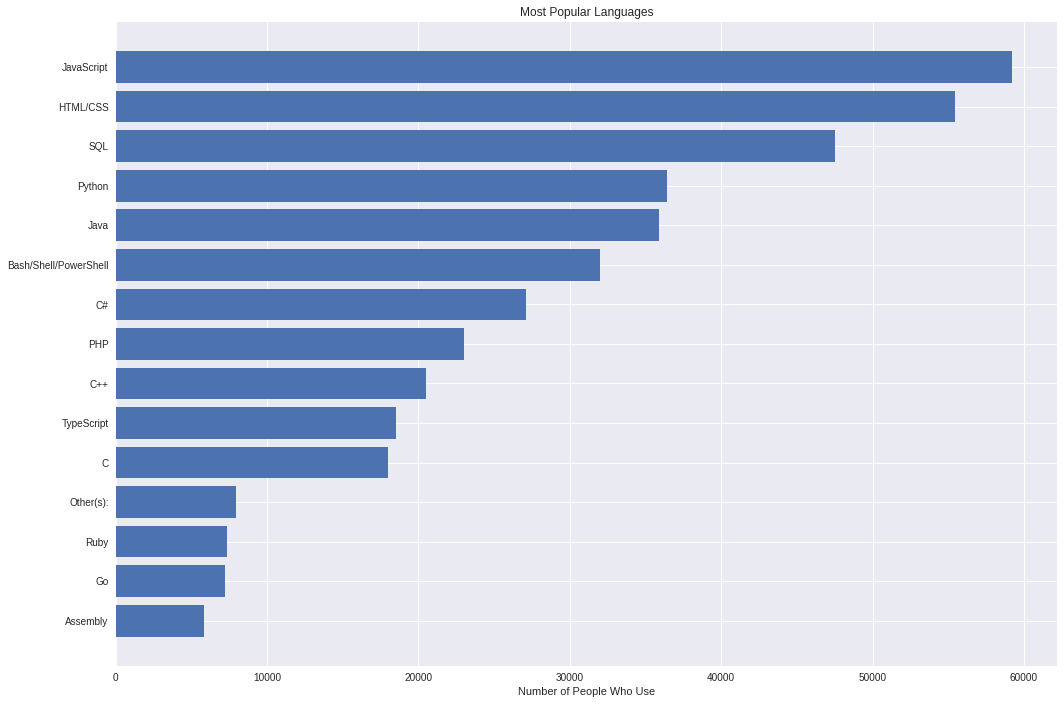

In [ ]:
import csv
import numpy as np
import pandas as pd
from collections import Counter
from matplotlib import pyplot as plt
plt.figure(figsize=(15,10))
plt.style.use("seaborn")

data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/data/data-2.csv')
ids = data['Responder_id']
lang_responses = data['LanguagesWorkedWith']

language_counter = Counter()

for response in lang_responses:
    language_counter.update(response.split(';'))

languages = []
popularity = []

for item in language_counter.most_common(15):
    languages.append(item[0])
    popularity.append(item[1])

languages.reverse()
popularity.reverse()

plt.barh(languages, popularity)

plt.title("Most Popular Languages")
# plt.ylabel("Programming Languages")
plt.xlabel("Number of People Who Use")

plt.tight_layout()

plt.show()

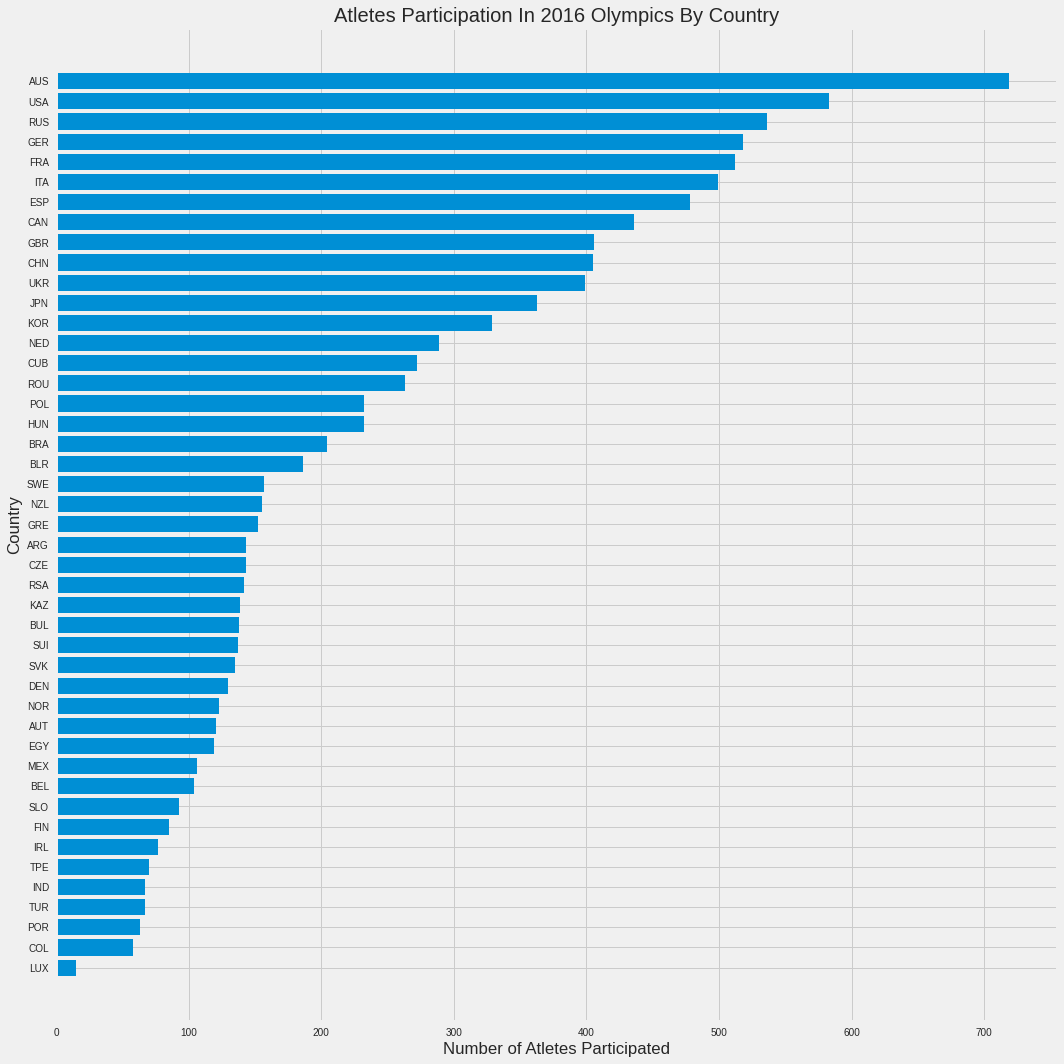

In [ ]:
import csv
import numpy as np
import pandas as pd
from collections import Counter
from matplotlib import pyplot as plt
plt.figure(figsize=(15,15))
# print(plt.style.available)
plt.style.use("fivethirtyeight")

#loading the data from CSV
athlete_data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/data/athlete_events.csv')

#filter first 50 countries where most number of atletes participation in all time
x = athlete_data.NOC.value_counts().index[0:50]
#filter all the data from those 50 countries
top_50_country_data = athlete_data[athlete_data.NOC.isin(x)]

#creating conditions to filter atletes participated in the year 2016
is_2016 =  top_50_country_data['Year']==2016

#then get the number of atletes from 2016 Olympics,those countires participated in 2000
y_2016=top_50_country_data[is_2016].NOC.value_counts().values[0:50]
#filter countries names participated in 2016 olympics,max to min
x_2016=top_50_country_data[is_2000].NOC.value_counts().index[0:50]

#reverse order of data min to max,
x_2016 = x_2016[::-1]
y_2016 = y_2016[::-1]

plt.barh(x_2016,y_2016,align='center')

plt.title("Atletes Participation In 2016 Olympics By Country")
plt.ylabel("Country")
plt.xlabel("Number of Atletes Participated")

plt.tight_layout()

plt.show()

#Pie Chart

Extensively used in presentations and offices, Pie Charts help 
* Show proportions and percentages between categories, by dividing a circle into proportional segments. Each arc length represents a proportion of each category, while the full circle represents the total sum of all the data, equal to 100%

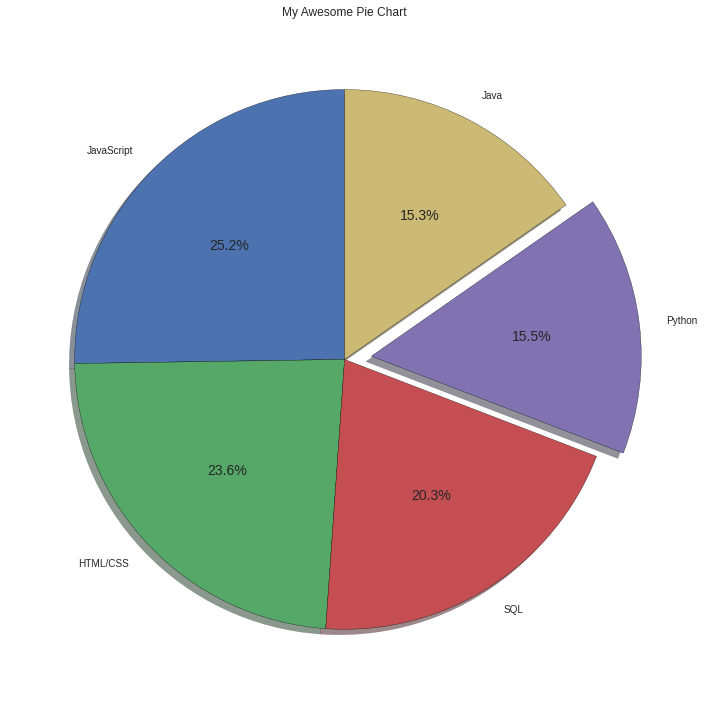

In [ ]:
from matplotlib import pyplot as plt
plt.figure(figsize=(10,10))
plt.style.use("seaborn")

slices = [59219, 55466, 47544, 36443, 35917]
labels = ['JavaScript', 'HTML/CSS', 'SQL', 'Python', 'Java']
explode = [0, 0, 0, 0.1, 0]

plt.pie(slices, labels=labels, explode=explode, shadow=True,
        startangle=90, autopct='%1.1f%%',
        wedgeprops={'edgecolor': 'black'})

plt.title("My Awesome Pie Chart")
plt.tight_layout()
plt.show()


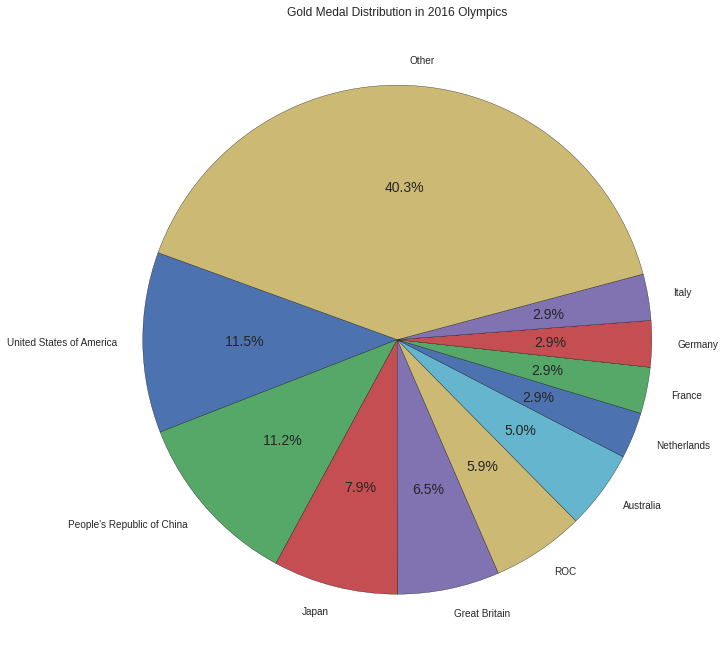

In [ ]:
from matplotlib import pyplot as plt
plt.figure(figsize=(10,10))
plt.style.use("seaborn")

#loading the data from CSV
medals_data = pd.read_excel('/content/drive/MyDrive/Colab Notebooks/data/Medals.xlsx')

top_10_gold_countries = np.array(medals_data['Gold'].to_numpy()[0:10])
top_10_gold_countries_name = np.array(medals_data['Team/NOC'].to_numpy()[0:10])
totalGoldByOther = medals_data['Gold'].sum() - top_10_gold_countries.sum()

top_10_gold_countries = np.append(top_10_gold_countries, totalGoldByOther)
top_10_gold_countries_name =  np.append(top_10_gold_countries_name, "Other")

explode = [0, 0, 0, 0, 0, 0,0,0,0,0,0]

plt.pie(top_10_gold_countries, labels=top_10_gold_countries_name, explode=explode, shadow=False,
        startangle=160, autopct='%1.1f%%',
        wedgeprops={'edgecolor': 'black'})

plt.title("Gold Medal Distribution in 2016 Olympics")
plt.tight_layout()
plt.show()

#Stack Plots

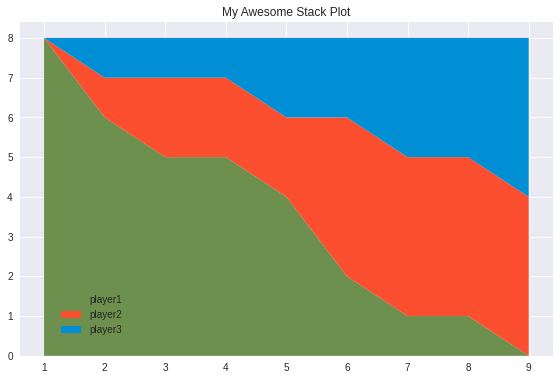

In [ ]:
from matplotlib import pyplot as plt

plt.style.use("seaborn")


minutes = [1, 2, 3, 4, 5, 6, 7, 8, 9]

player1 = [8, 6, 5, 5, 4, 2, 1, 1, 0]
player2 = [0, 1, 2, 2, 2, 4, 4, 4, 4]
player3 = [0, 1, 1, 1, 2, 2, 3, 3, 4]

labels = ['player1', 'player2', 'player3']
colors = ['#6d904f', '#fc4f30', '#008fd5']

plt.stackplot(minutes, player1, player2, player3, labels=labels, colors=colors)

plt.legend(loc=(0.07, 0.05))

plt.title("My Awesome Stack Plot")
plt.tight_layout()
plt.show()

# Colors:
# Blue = #008fd5
# Red = #fc4f30
# Yellow = #e5ae37
# Green = #6d904f

#Filling Area on Line Plots

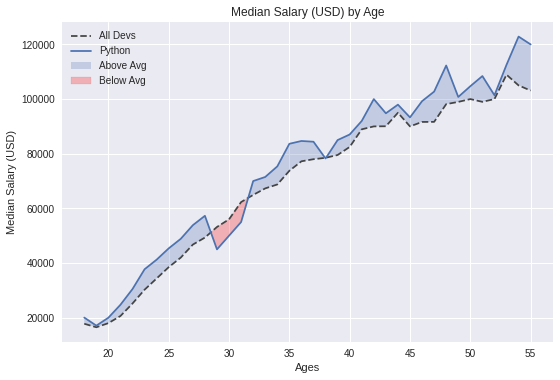

In [ ]:
import pandas as pd
from matplotlib import pyplot as plt


data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/data/data-5.csv')
ages = data['Age']
dev_salaries = data['All_Devs']
py_salaries = data['Python']
js_salaries = data['JavaScript']

plt.plot(ages, dev_salaries, color='#444444',
         linestyle='--', label='All Devs')

plt.plot(ages, py_salaries, label='Python')

overall_median = 57287

plt.fill_between(ages, py_salaries, dev_salaries,
                 where=(py_salaries > dev_salaries),
                 interpolate=True, alpha=0.25, label='Above Avg')

plt.fill_between(ages, py_salaries, dev_salaries,
                 where=(py_salaries <= dev_salaries),
                 interpolate=True, color='red', alpha=0.25, label='Below Avg')

plt.legend()

plt.title('Median Salary (USD) by Age')
plt.xlabel('Ages')
plt.ylabel('Median Salary (USD)')

plt.tight_layout()

plt.show()

#Histograms


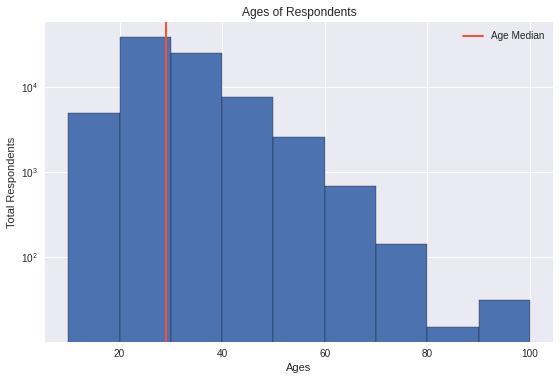

In [ ]:
import pandas as pd
from matplotlib import pyplot as plt

plt.style.use('seaborn')

data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/data/data-6.csv')
ids = data['Responder_id']
ages = data['Age']

bins = [10, 20, 30, 40, 50, 60, 70, 80, 90, 100]

plt.hist(ages, bins=bins, edgecolor='black', log=True)

median_age = 29
color = '#fc4f30'

plt.axvline(median_age, color=color, label='Age Median', linewidth=2)

plt.legend()

plt.title('Ages of Respondents')
plt.xlabel('Ages')
plt.ylabel('Total Respondents')

plt.tight_layout()

plt.show()

#Scatter Plots

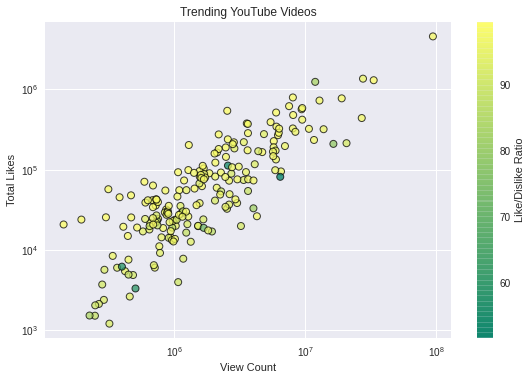

In [ ]:

import pandas as pd
from matplotlib import pyplot as plt

plt.style.use('seaborn')

data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/data/2019-05-31-data.csv')
view_count = data['view_count']
likes = data['likes']
ratio = data['ratio']

plt.scatter(view_count, likes, c=ratio, cmap='summer',
            edgecolor='black', linewidth=1, alpha=0.75)

cbar = plt.colorbar()
cbar.set_label('Like/Dislike Ratio')

plt.xscale('log')
plt.yscale('log')

plt.title('Trending YouTube Videos')
plt.xlabel('View Count')
plt.ylabel('Total Likes')

plt.tight_layout()

plt.show()

#Plotting Time Series Data

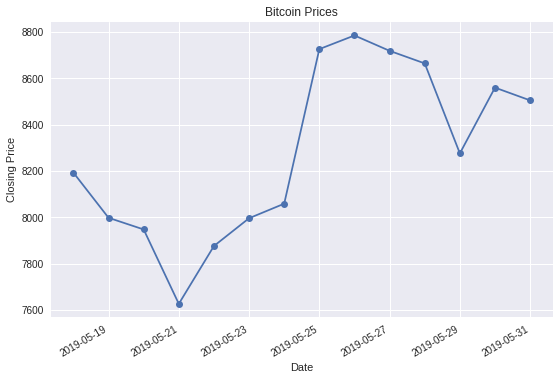

In [ ]:
import pandas as pd
from datetime import datetime, timedelta
from matplotlib import pyplot as plt
from matplotlib import dates as mpl_dates

plt.style.use('seaborn')

data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/data/data-8.csv')
data['Date'] = pd.to_datetime(data['Date'])
data.sort_values('Date', inplace=True)

price_date = data['Date']
price_close = data['Close']

plt.plot_date(price_date, price_close, linestyle='solid')

plt.gcf().autofmt_xdate()

plt.title('Bitcoin Prices')
plt.xlabel('Date')
plt.ylabel('Closing Price')

plt.tight_layout()

plt.show()

#Plotting Live Data in Real-Time

In [ ]:
import random
from itertools import count
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from IPython.display import HTML

plt.style.use('fivethirtyeight')

x_vals = []
y_vals = []

index = count()

# def animate(i):
#   x_vals.append(next(index))
#   y_vals.append(random.randint(0,5))
#   plt.cla()
#   plt.plot(x_vals, y_vals, label='Channel 1')
#   plt.legend(loc='upper left')
#   plt.tight_layout()

# ani = animation.FuncAnimation(plt.gcf(), animate, interval=1000)
# ani


def animate(i):
    data = pd.read_csv('/content/real-time-feed.csv')
    currentIndex = next(index)
    x = data['x_value'].value_counts(sort=False).index[0:currentIndex]
    y1 = data['total_1'].value_counts(sort=False).index[0:currentIndex]
    y2 = data['total_2'].value_counts(sort=False).index[0:currentIndex]
    x_vals.append(currentIndex)
    

    # plt.cla()
    # plt.plot(x_vals, y_vals, label='Channel 1')
    # # plt.plot(x, y2, label='Channel 2')

    # plt.legend(loc='upper left')
    # plt.tight_layout()


ani = animation.FuncAnimation(plt.gcf(), animate, interval=1000)

HTML(ani.to_html5_video())


AttributeError: ignored

<Figure size 432x288 with 0 Axes>

In [ ]:
import csv
import random
import time

x_value = 0
total_1 = 1000
total_2 = 1000

fieldnames = ["x_value", "total_1", "total_2"]


with open('real-time-feed.csv', 'w') as csv_file:
    csv_writer = csv.DictWriter(csv_file, fieldnames=fieldnames)
    csv_writer.writeheader()

while True:

    with open('real-time-feed.csv', 'a') as csv_file:
        csv_writer = csv.DictWriter(csv_file, fieldnames=fieldnames)

        info = {
            "x_value": x_value,
            "total_1": total_1,
            "total_2": total_2
        }

        csv_writer.writerow(info)
        print(x_value, total_1, total_2)

        x_value += 1
        total_1 = total_1 + random.randint(-6, 8)
        total_2 = total_2 + random.randint(-5, 6)

    time.sleep(1)

35 1044 1015
36 1048 1013
37 1056 1010


KeyboardInterrupt: ignored

#SubPlots

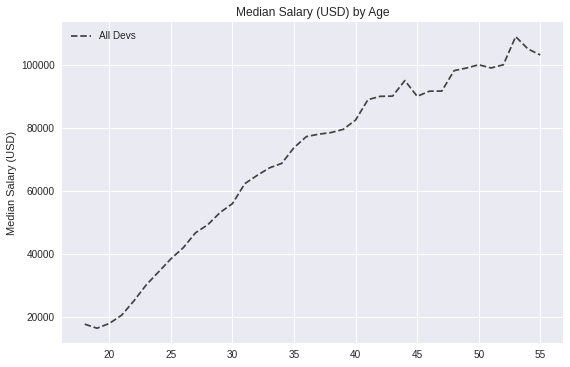

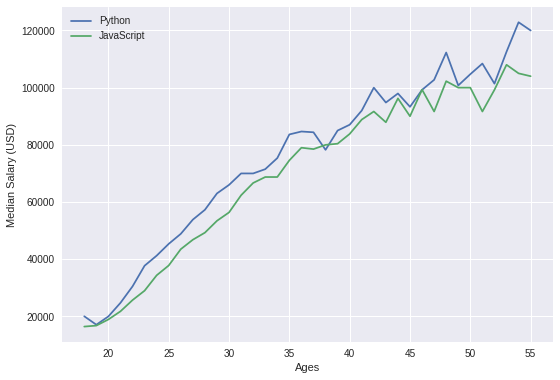

In [ ]:

import pandas as pd
from matplotlib import pyplot as plt

plt.style.use('seaborn')

data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/data/data-10.csv')
ages = data['Age']
dev_salaries = data['All_Devs']
py_salaries = data['Python']
js_salaries = data['JavaScript']

fig1, ax1 = plt.subplots()
fig2, ax2 = plt.subplots()

ax1.plot(ages, dev_salaries, color='#444444',linestyle='--', label='All Devs')

ax2.plot(ages, py_salaries, label='Python')
ax2.plot(ages, js_salaries, label='JavaScript')

ax1.legend()
ax1.set_title('Median Salary (USD) by Age')
ax1.set_ylabel('Median Salary (USD)')

ax2.legend()
ax2.set_xlabel('Ages')
ax2.set_ylabel('Median Salary (USD)')

plt.tight_layout()

plt.show()

fig1.savefig('fig1.png')
fig2.savefig('fig2.png')